<a href="https://colab.research.google.com/github/misiek447/merito-2025/blob/main/backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Import niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (opcjonalnie, do wstępnej wizualizacji)
import seaborn as sns

# ustawienia dla czytelnych wykresów
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
# 2.1. Wczytanie pliku CSV do DataFrame
df = pd.read_csv('/content/results_cleaned.csv')   # lub ścieżka, pod którą wrzuciłeś plik

# 2.2. Rzut oka na strukturę danych
print(df.shape)        # ile wierszy i kolumn?
df.info()              # typy kolumn i braki danych
display(df.head(5))    # pierwsze 5 wierszy

# 2.3. Podstawowe statystyki opisowe
display(df.describe(include='all'))

(27065, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27065 entries, 0 to 27064
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        27065 non-null  object
 1   home_team   27065 non-null  object
 2   away_team   27065 non-null  object
 3   home_score  27065 non-null  int64 
 4   away_score  27065 non-null  int64 
 5   tournament  27065 non-null  object
 6   city        27065 non-null  object
 7   country     27065 non-null  object
 8   isNeutral   27065 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.9+ MB


,date,home_team,away_team,home_score,away_score,tournament,city,country,isNeutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,0


,date,home_team,away_team,home_score,away_score,tournament,city,country,isNeutral
count,27065,27065,27065,27065.000000,27065.000000,27065,27065,27065,27065.000000
unique,12677,257,263,NaN,NaN,127,1259,255,NaN
top,2003-03-29,Brazil,England,NaN,NaN,Friendly,Kuala Lumpur,Malaysia,NaN
freq,34,443,420,NaN,NaN,11099,629,628,NaN
mean,NaN,NaN,NaN,2.175688,1.606540,NaN,NaN,NaN,0.244375
std,NaN,NaN,NaN,2.224717,2.012111,NaN,NaN,NaN,0.429724
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,0.000000


In [5]:
# 1. Konwersja kolumny date na datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Sprawdźmy, czy konwersja się powiodła
print(df['date'].dtype)
print(df['date'].min(), '–', df['date'].max())

# 2. Eksploracja wartości w kolumnie tournament
tourn_counts = df['tournament'].value_counts()
display(tourn_counts.head(10))    # Top 10 najczęstszych turniejów
print(f"Łącznie odnotowaliśmy {len(tourn_counts)} unikalnych turniejów.")

# (opcjonalnie) zobaczmy, ile meczów towarzyskich vs World Cup
friendly_games = tourn_counts.get('Friendly', 0)
worldcup_games = tourn_counts.filter(like='World Cup').sum()
print(f"Mecze towarzyskie: {friendly_games}")
print(f"Mecze World Cup (wszystkie edycje): {worldcup_games}")

datetime64[ns]
1872-11-30 00:00:00 – 2003-12-02 00:00:00


,count
tournament,
Friendly,11099
FIFA World Cup qualification,3710
UEFA Euro qualification,1371
African Cup of Nations qualification,1075
Copa América,651
FIFA World Cup,644
Merdeka Tournament,579
British Home Championship,517
African Cup of Nations,384


Łącznie odnotowaliśmy 127 unikalnych turniejów.
Mecze towarzyskie: 11099
Mecze World Cup (wszystkie edycje): 4354


In [6]:
# Wyfiltrujmy unikalne nazwy zawierające "World Cup" i "Euro"
wc_names = [name for name in df['tournament'].unique() if "World Cup" in name]
eu_names = [name for name in df['tournament'].unique() if "Euro" in name]
print("World Cup:", wc_names)
print("Euro:", eu_names)

World Cup: ['FIFA World Cup', 'FIFA World Cup qualification']
Euro: ['Central European International Cup', 'UEFA Euro qualification', 'UEFA Euro']


In [25]:
# Zamieńmy błędnie zakodowane "Copa AmÃ©rica" na "Copa América"
df['tournament'] = df['tournament'].str.replace(
    'Copa AmÃ©rica',
    'Copa América',
    regex=False
)


In [26]:
# 2.1 Zdefiniujmy listy nazw finałów
final_wc = ["FIFA World Cup"]       # dopisz dokładne nazwy z kroku wyżej, jeśli się różnią
final_euro = ["UEFA Euro"]
final_amer  = ["Copa América"]

# 2.2 Dodaj kolumny
df['is_friendly'] = (df['tournament'] == "Friendly").astype(int)
df['is_major'] = df['tournament'].isin(final_wc + final_euro + final_amer).astype(int)

# 2.3 Sprawdźmy nowe podziały
print("Mecze towarzyskie:", df['is_friendly'].sum())
print("Mecze finałów World Cup + Euro + Copa America:", df['is_major'].sum())

Mecze towarzyskie: 11099
Mecze finałów World Cup + Euro + Copa America: 1437


In [27]:
# 3.1. Dodajemy kolumnę year
df['year'] = df['date'].dt.year

# 3.2. Filtrowanie meczów finałów (World Cup + Euro)
majors = df[df['is_major'] == 1].copy()

print("Liczba meczów finałowych po filtrowaniu:", majors.shape[0])
majors['tournament'].value_counts()

Liczba meczów finałowych po filtrowaniu: 1437


,count
tournament,
Copa América,651
FIFA World Cup,644
UEFA Euro,142


In [28]:
# 4.1. Funkcja do wyliczenia punktów i bramek z jednego meczu
def compute_outcome(row, team_col_prefix):
    # team_col_prefix: "home" lub "away"
    goals_for = row[f'{team_col_prefix}_score']
    goals_against = row[f'{"away" if team_col_prefix=="home" else "home"}_score']
    if goals_for > goals_against:
        pts = 3
        w, d, l = 1, 0, 0
    elif goals_for == goals_against:
        pts = 1
        w, d, l = 0, 1, 0
    else:
        pts = 0
        w, d, l = 0, 0, 1
    return pd.Series({
        'team': row[f'{team_col_prefix}_team'],
        'year': row['year'],
        'points': pts,
        'win': w,
        'draw': d,
        'loss': l,
        'goals_for': goals_for,
        'goals_against': goals_against
    })

# 4.2. Rozbijamy każdy mecz na dwa wiersze: jedna dla drużyny gospodarzy, druga dla gości
home_stats = majors.apply(lambda r: compute_outcome(r, 'home'), axis=1)
away_stats = majors.apply(lambda r: compute_outcome(r, 'away'), axis=1)

team_matches = pd.concat([home_stats, away_stats], ignore_index=True)

# 4.3. Agregacja po (team, year)
agg = team_matches.groupby(['team','year']).agg(
    matches_played = ('points', 'size'),
    wins           = ('win', 'sum'),
    draws          = ('draw', 'sum'),
    losses         = ('loss', 'sum'),
    total_points   = ('points', 'sum'),
    goals_for      = ('goals_for', 'sum'),
    goals_against  = ('goals_against', 'sum'),
).reset_index()

agg['avg_points'] = agg['total_points'] / agg['matches_played']
agg['goal_diff']  = agg['goals_for'] - agg['goals_against']

# 4.4. Rzut oka na wynik
display(agg.head())
print("Liczba obserwacji (team,year):", agg.shape[0])


,team,year,matches_played,wins,draws,losses,total_points,goals_for,goals_against,avg_points,goal_diff
0,Algeria,1982,3,2,0,1,6,5,5,2.000000,0
1,Algeria,1986,3,0,1,2,1,1,5,0.333333,-4
2,Argentina,1916,3,1,2,0,5,7,2,1.666667,5
3,Argentina,1917,3,2,0,1,6,5,3,2.000000,2
4,Argentina,1919,3,0,0,3,0,6,11,0.000000,-5


Liczba obserwacji (team,year): 692


In [29]:
# 5.1. Filtrowanie meczów towarzyskich
friendlies = df[df['is_friendly'] == 1].copy()

# Przekształcamy je jak wcześniej – każda drużyna jako osobny wiersz
home_f = friendlies.apply(lambda r: compute_outcome(r, 'home'), axis=1)
away_f = friendlies.apply(lambda r: compute_outcome(r, 'away'), axis=1)
friendlies_expanded = pd.concat([home_f, away_f], ignore_index=True)
friendlies_expanded['date'] = df.loc[friendlies_expanded.index, 'date'].values


In [30]:
# 5.2. Funkcja, która dla każdej drużyny i roku zbierze statystyki z ostatnich 12 mies.
def get_friendly_stats(team, year):
    start_date = pd.Timestamp(year=year-1, month=6, day=1)
    end_date   = pd.Timestamp(year=year, month=6, day=1)

    mask = (
        (friendlies_expanded['team'] == team) &
        (friendlies_expanded['date'] >= start_date) &
        (friendlies_expanded['date'] < end_date)
    )
    df_f = friendlies_expanded.loc[mask]

    if df_f.empty:
        return pd.Series({
            'friendly_matches': 0,
            'friendly_win_rate': np.nan,
            'friendly_goal_diff_avg': np.nan
        })

    return pd.Series({
        'friendly_matches': len(df_f),
        'friendly_win_rate': df_f['win'].sum() / len(df_f),
        'friendly_goal_diff_avg': (df_f['goals_for'] - df_f['goals_against']).mean()
    })

# 5.3. Obliczanie cech
features = agg.apply(lambda row: get_friendly_stats(row['team'], row['year']), axis=1)

# 5.4. Scalanie z agregatem
dataset = pd.concat([agg, features], axis=1)

# Usuwamy wiersze bez danych towarzyskich (jeśli nie chcemy imputować)
dataset.dropna(subset=['friendly_win_rate'], inplace=True)

# Podgląd
display(dataset.head())


,team,year,matches_played,wins,draws,losses,total_points,goals_for,goals_against,avg_points,goal_diff,friendly_matches,friendly_win_rate,friendly_goal_diff_avg
1,Algeria,1986,3,0,1,2,1,1,5,0.333333,-4,1.0,0.0,0.0
2,Argentina,1916,3,1,2,0,5,7,2,1.666667,5,1.0,0.0,-2.0
9,Argentina,1924,3,1,2,0,5,2,0,1.666667,2,2.0,1.0,2.0
10,Argentina,1925,4,3,1,0,10,11,4,2.500000,7,1.0,1.0,2.0
11,Argentina,1926,4,2,1,1,7,14,3,1.750000,11,1.0,1.0,3.0


In [31]:
# 1. Filtrowanie meczów kwalifikacyjnych
quals = df[df['tournament'].str.contains("qualification")].copy()

# 2. Rozbijamy każdy mecz na dwa wiersze i od razu dołączamy datę
def compute_outcome_with_date(row, side):
    # side = 'home' lub 'away'
    goals_for    = row[f'{side}_score']
    goals_away   = row[f'{"away" if side=="home" else "home"}_score']
    if goals_for > goals_away:
        pts, w, d, l = 3, 1, 0, 0
    elif goals_for == goals_away:
        pts, w, d, l = 1, 0, 1, 0
    else:
        pts, w, d, l = 0, 0, 0, 1
    return {
        'team':            row[f'{side}_team'],
        'date':            row['date'],
        'points':          pts,
        'win':             w,
        'draw':            d,
        'loss':            l,
        'goals_for':       goals_for,
        'goals_against':   goals_away
    }

home_q = quals.apply(lambda r: compute_outcome_with_date(r, 'home'), axis=1)
away_q = quals.apply(lambda r: compute_outcome_with_date(r, 'away'), axis=1)

quals_expanded = pd.DataFrame(home_q.tolist() + away_q.tolist())

# 3. Szybkie sprawdzenie
print(quals_expanded.columns)   # powinny być: team, date, points, win, draw, loss, goals_for, goals_against
print("Liczba wierszy w bolsze:", quals_expanded.shape)


Index(['team', 'date', 'points', 'win', 'draw', 'loss', 'goals_for',
       'goals_against'],
      dtype='object')
Liczba wierszy w bolsze: (14314, 8)


In [32]:
# 4. Funkcja zbierająca statystyki kwalifikacji
def get_qual_stats(team, year):
    start = pd.Timestamp(year=year-1, month=6, day=1)
    end   = pd.Timestamp(year=year,   month=6, day=1)
    mask = (
        (quals_expanded['team'] == team) &
        (quals_expanded['date'] >= start) &
        (quals_expanded['date'] <  end)
    )
    df_q = quals_expanded.loc[mask]
    if df_q.empty:
        return pd.Series({
            'qual_matches':        0,
            'qual_win_rate':     np.nan,
            'qual_goal_diff_avg': np.nan
        })
    return pd.Series({
        'qual_matches':      len(df_q),
        'qual_win_rate':     df_q['win'].sum() / len(df_q),
        'qual_goal_diff_avg': (df_q['goals_for'] - df_q['goals_against']).mean()
    })

# 5. Dodanie tych cech do 'agg' i stworzenie nowego dataset_ext
qual_feats = agg.apply(lambda r: get_qual_stats(r['team'], r['year']), axis=1)
dataset_ext = pd.concat([dataset, qual_feats], axis=1)
dataset_ext.dropna(subset=['friendly_win_rate','qual_win_rate'], inplace=True)

display(dataset_ext.head())


,team,year,matches_played,wins,draws,losses,total_points,goals_for,goals_against,avg_points,goal_diff,friendly_matches,friendly_win_rate,friendly_goal_diff_avg,qual_matches,qual_win_rate,qual_goal_diff_avg
1,Algeria,1986.0,3.0,0.0,1.0,2.0,1.0,1.0,5.0,0.333333,-4.0,1.0,0.000000,0.000000,6.0,0.833333,2.00
27,Argentina,1958.0,3.0,1.0,0.0,2.0,3.0,5.0,10.0,1.000000,-5.0,1.0,0.000000,0.000000,4.0,0.500000,0.00
31,Argentina,1966.0,4.0,2.0,1.0,1.0,7.0,4.0,2.0,1.750000,2.0,2.0,0.000000,-0.500000,4.0,0.750000,1.75
33,Argentina,1974.0,6.0,1.0,2.0,3.0,5.0,9.0,12.0,0.833333,-3.0,6.0,1.000000,2.333333,4.0,1.000000,3.75
39,Argentina,1986.0,7.0,6.0,1.0,0.0,19.0,19.0,10.0,2.714286,9.0,12.0,0.083333,-0.583333,5.0,0.600000,1.00


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Przygotowanie X i y
feature_cols = [
    'friendly_matches','friendly_win_rate','friendly_goal_diff_avg',
    'qual_matches','qual_win_rate','qual_goal_diff_avg'
]
X = dataset_ext[feature_cols]
y = dataset_ext['avg_points']

# 2. Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Pipeline ze scalerem i RandomForest
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# 4. Trenowanie
pipe.fit(X_train, y_train)

# 5. Ewaluacja
y_pred = pipe.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2   = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")


MAE:  0.643
RMSE: 0.814
R²:   -0.088


In [42]:
from sklearn.model_selection import train_test_split

# Wybieramy cechy i target
X = dataset_ext[['friendly_matches', 'friendly_win_rate', 'friendly_goal_diff_avg', 'qual_matches','qual_win_rate','qual_goal_diff_avg']]
y = dataset_ext['avg_points']   # regresja: przewidujemy średnią punktów

# Podział (70% trening, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 196, Test samples: 84


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Trenowanie
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

MAE:  0.641
RMSE: 0.811


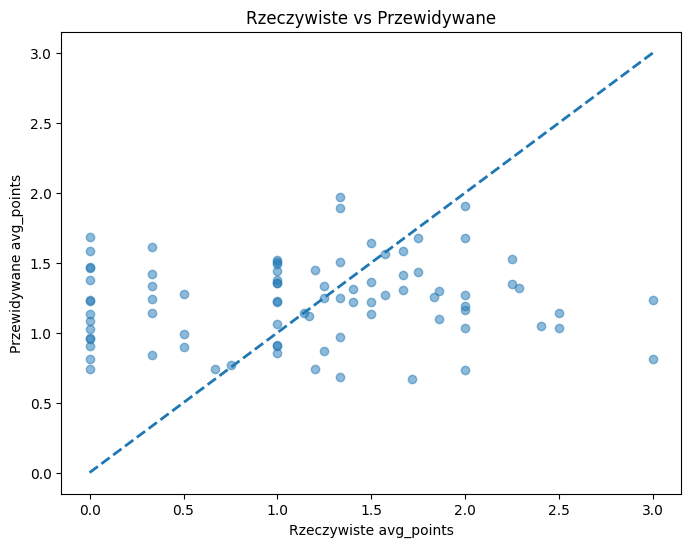

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Predykcje
y_pred = pipe.predict(X_test)

# Metryki
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)       # bez parametru squared
rmse = np.sqrt(mse)                             # wyciągamy pierwiastek

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

# Wykres rzeczywiste vs. przewidywane
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste avg_points')
plt.ylabel('Przewidywane avg_points')
plt.title('Rzeczywiste vs Przewidywane')
plt.show()



In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")


R²: -0.081


In [46]:
import pandas as pd

# Wyciągnięcie feature importances z modelu RandomForest
importances = pipe.named_steps['model'].feature_importances_
feat_names = X.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
print(feat_imp)


qual_goal_diff_avg        0.237482
friendly_goal_diff_avg    0.236455
qual_matches              0.143952
friendly_win_rate         0.140434
friendly_matches          0.135735
qual_win_rate             0.105943
dtype: float64


In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Zakres parametrów
param_dist = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rs = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)

# Uruchom wyszukiwanie
rs.fit(X_train, y_train)

# Zobacz najlepsze parametry i osiągi
print("Best params:", rs.best_params_)
print("Best MAE (CV):", -rs.best_score_)


Best params: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 5}
Best MAE (CV): 0.6173457313121808


In [48]:
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE test: ", mean_absolute_error(y_test, y_pred))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² test:  ", r2_score(y_test, y_pred))


MAE test:  0.6389347224059668
RMSE test: 0.7993493944825995
R² test:   -0.049834806043740576


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

lin = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
lin.fit(X_train, y_train)
y_lin = lin.predict(X_test)

print("Linear MAE:  ", mean_absolute_error(y_test, y_lin))
print("Linear RMSE: ", np.sqrt(mean_squared_error(y_test, y_lin)))
print("Linear R²:   ", r2_score(y_test, y_lin))


Linear MAE:   0.6418636516304062
Linear RMSE:  0.8006686688750516
Linear R²:    -0.053303034401764204
